# Eindresultaat Captcha Solver onderzoek
## Gemaakt door
* Steven Velderman
* Auke Onvlee
* Alex Cheng
* Mike van Egmond

In dit bestand tonen we het beste resultaat wat we hebben kunnen behalen voor onze CAPTCHA solver. We hebben gebruik gemaakt van een dataset met 400 afbeeldingen die we hebben kunnen uitbreiden met Data Augmentation tot 1000+. 




# Opzet van het project
Eerst wordt het project opgezet. De nieuwste versie van YOLOv5 wordt gedownload, de dependencies worden geinstalleerd en pytorch wordt geïmporteerd.

We gebruiken de GPU van Google Colab tijdens het uitvoeren van deze Notebook.

In [1]:
import os.path

# Go to root of project.
%cd /content
# Only clone repo if not already present
if os.path.isdir("yolov5"):
  print ("File exist")
else:
  !git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13692, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13692 (delta 2), reused 4 (delta 1), pack-reused 13683
Receiving objects: 100% (13692/13692), 12.22 MiB | 7.91 MiB/s, done.
Resolving deltas: 100% (9563/9563), done.
/content/yolov5
     |████████████████████████████████| 596 kB 18.8 MB/s 
Setup complete. Using torch 1.11.0+cu113 (Tesla T4)


# Detecteren met zelf getrainde weights.

We gebruiken het YOLOv5m6 model. Dit model is met aagepaste Hyper Parameters getraind. Dit model werkt voor ons het beste want het heeft een goede balans tussen grootte en snelheid. Hierdoor was het mogelijk om het model voor veel epochs te trainen.

Het trainen heeft in verschillende stappen plaatsgevonden over een periode van 6 uur en 45 minuten.


# Download de gewichten en test afbeeldingen
We downloaden de gewichten van GitHub.

In [2]:
# Go to root of project.
%cd /content

# Only clone repo if not already present
if os.path.isdir("captcha-solver"):
  print ("File exist")
else:
  !git clone https://github.com/mve/captcha-solver  # clone repo

# Return to yolov5 directory
%cd yolov5

/content
Cloning into 'captcha-solver'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 129 (delta 0), reused 29 (delta 0), pack-reused 100
Receiving objects: 100% (129/129), 456.05 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Checking out files: 100% (59/59), done.
/content/yolov5


# Detecteren
We laten nu het model voorspellingen doen op de test afbeeldingen. Het model zal de objecten detecteren, daar een label omheen plaatsen. Het model geeft per object aan welke class hij denkt dat daarbij hoord en geeft daar ook een confidence score aan.

In [3]:
!python detect.py --weights /content/captcha-solver/weights/v37-yolov5m6-hyper-300.pt --img 800 --conf 0.1 --line-thickness 2 --agnostic-nms --source /content/captcha-solver/images/test

detect: weights=['/content/captcha-solver/weights/v37-yolov5m6-hyper-300.pt'], source=/content/captcha-solver/images/test, data=data/coco128.yaml, imgsz=[800, 800], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-220-g68ff6c9 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 378 layers, 35393220 parameters, 0 gradients
image 1/25 /content/captcha-solver/images/test/abamps_jpg.rf.0ac8217717a6cd636ebae2424bc955c3.jpg: 256x832 2 as, 1 b, 1 m, 1 p, 1 s, Done. (0.026s)
image 2/25 /content/captcha-solver/images/test/acinar_jpg.rf.50350b5b21675dca4161717eb0d9df1b.jpg: 256x832 2 as, 1 c, 1 i, 1 n, 1 r, Done. (0.025s)
image 3/25 /content/captcha-solver/

# Toon de resultaten
We tonen nu alle afbeeldingen met de voorspellingen van het model.

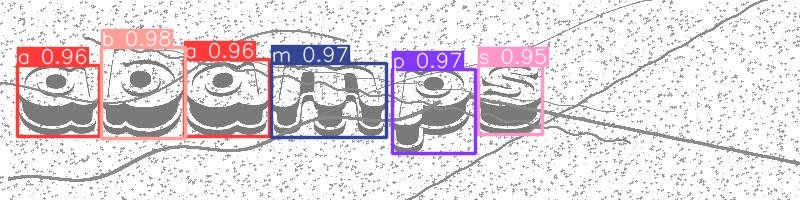

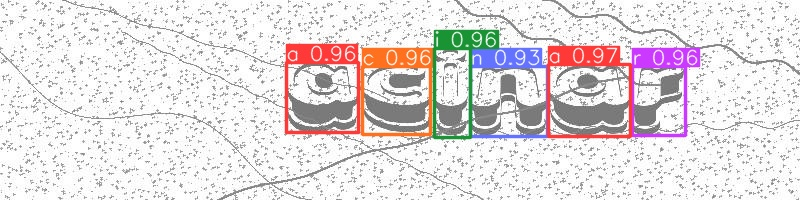

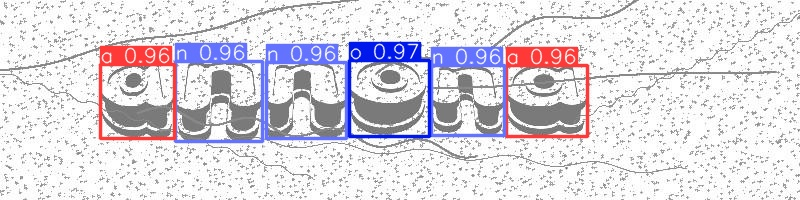

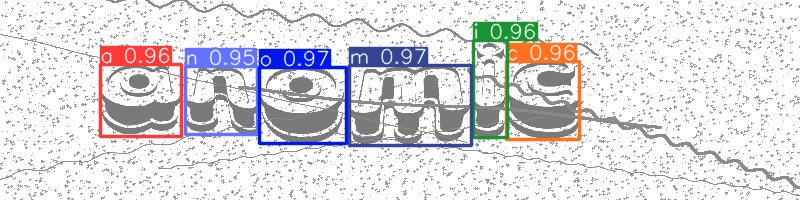

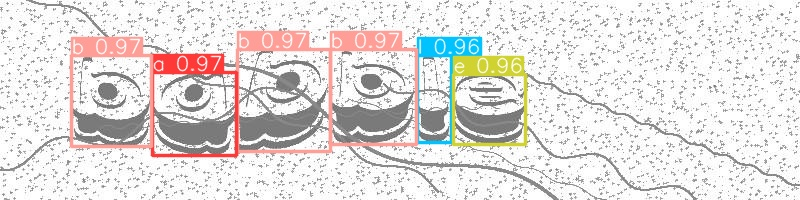

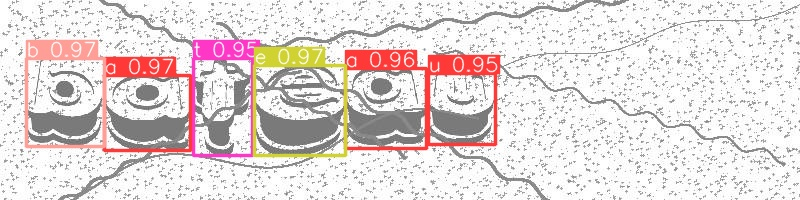

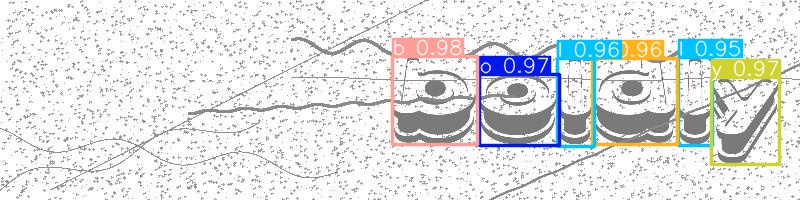

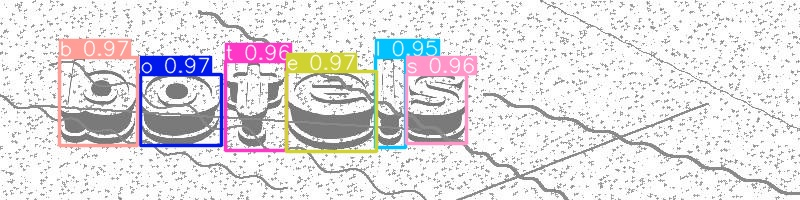

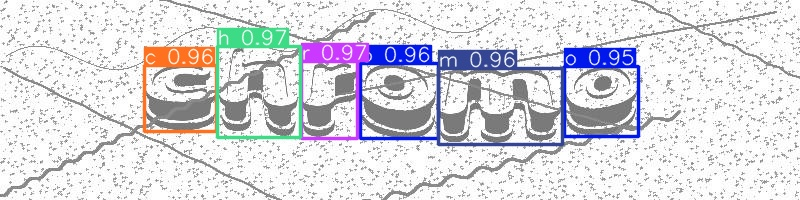

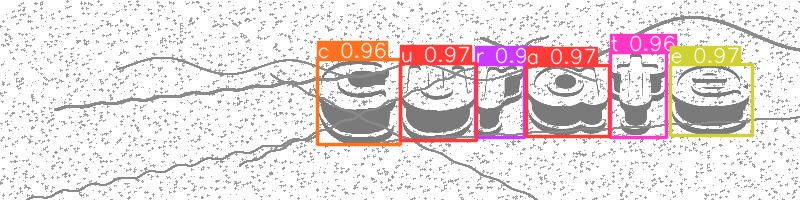

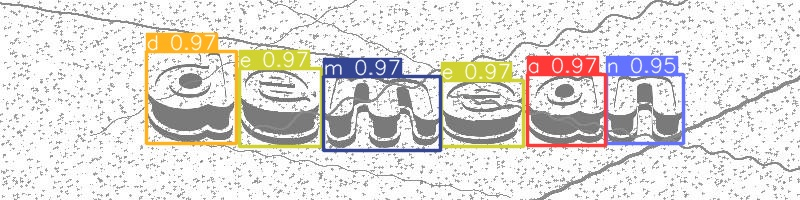

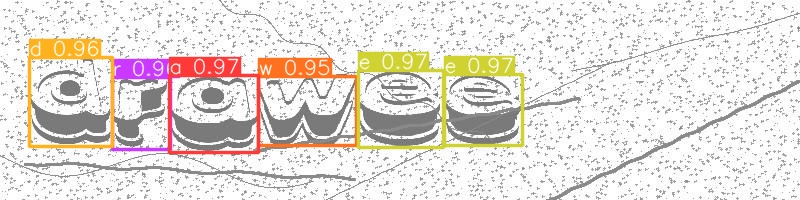

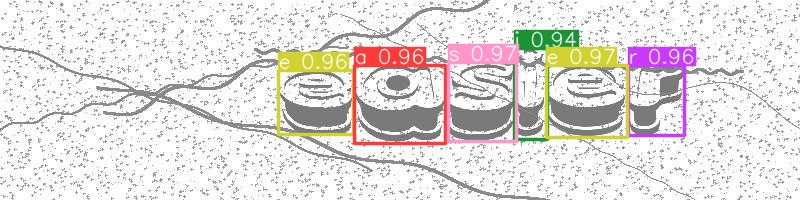

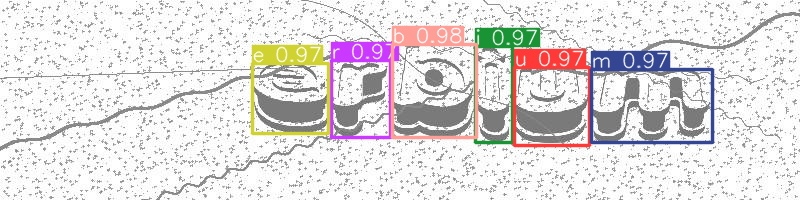

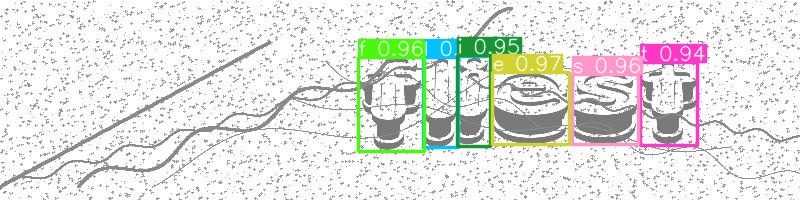

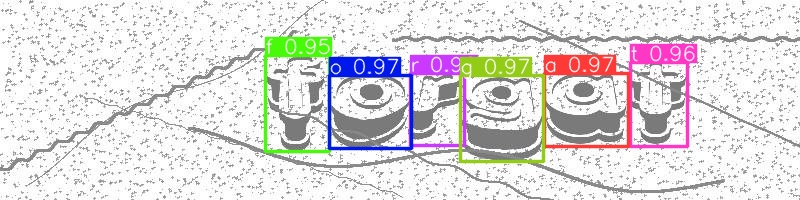

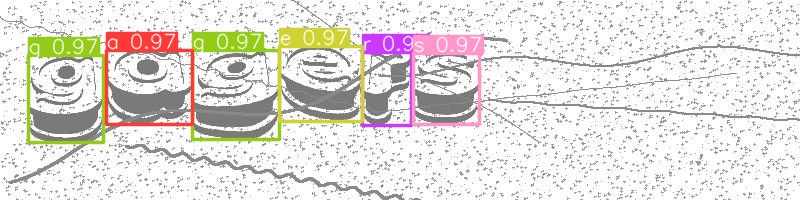

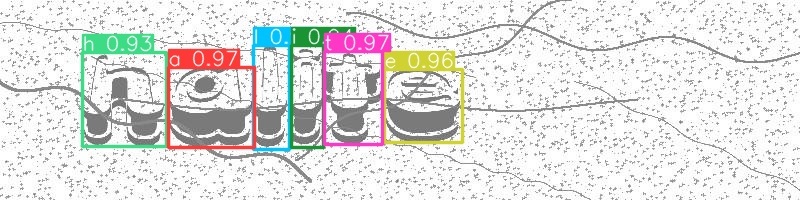

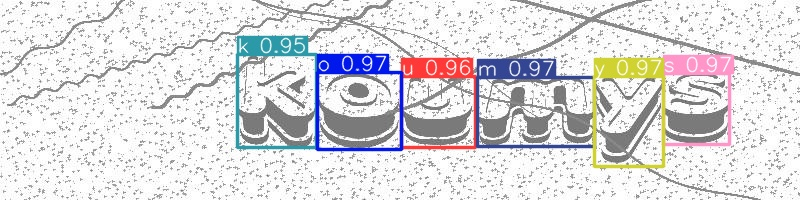

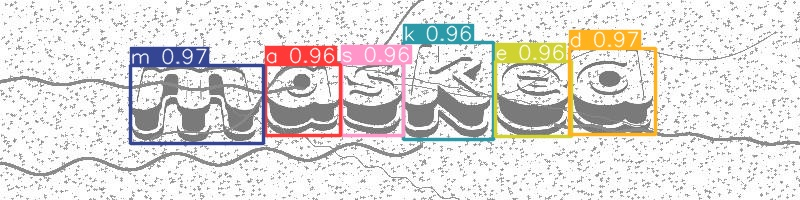

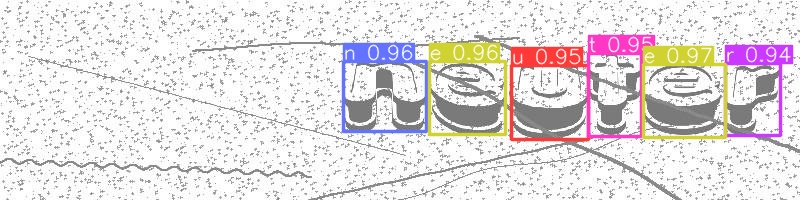

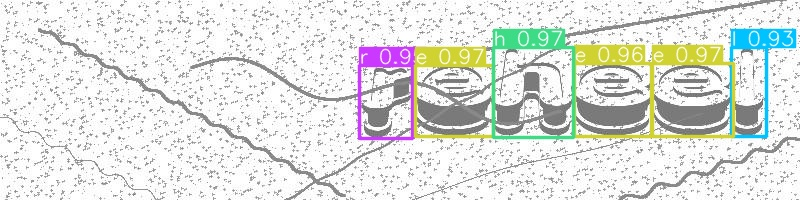

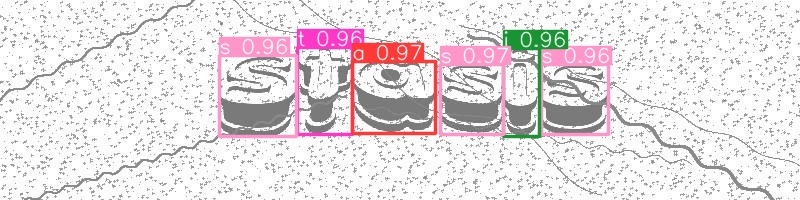

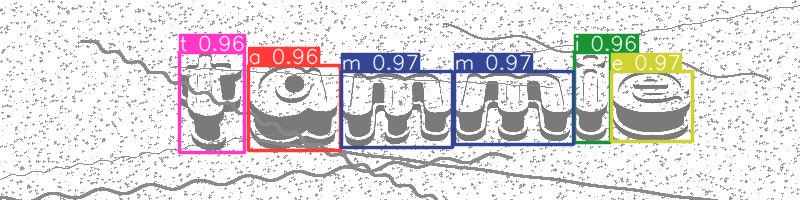

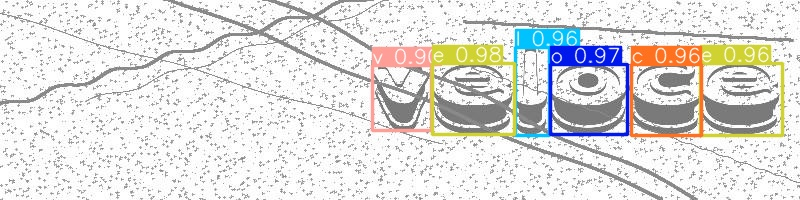

In [8]:
import glob
from IPython.display import Image, display

for imageName in sorted(glob.glob('/content/yolov5/runs/detect/exp/*.jpg')): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Custom Afbeeldingen
Voor de demo nog een aantal zelf gemaakte afbeeldingen.

In [5]:
!python detect.py --weights /content/captcha-solver/weights/v37-yolov5m6-hyper-300.pt --img 800 --conf 0.1 --line-thickness 2 --agnostic-nms --source /content/captcha-solver/images/custom

detect: weights=['/content/captcha-solver/weights/v37-yolov5m6-hyper-300.pt'], source=/content/captcha-solver/images/custom, data=data/coco128.yaml, imgsz=[800, 800], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-220-g68ff6c9 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 378 layers, 35393220 parameters, 0 gradients
image 1/10 /content/captcha-solver/images/custom/0-captcha.jpg: 256x832 2 as, 2 cs, 1 h, 1 p, 1 t, Done. (0.027s)
image 2/10 /content/captcha-solver/images/custom/1-solver.jpg: 256x832 1 e, 1 l, 1 o, 1 r, 1 s, 1 v, Done. (0.026s)
image 3/10 /content/captcha-solver/images/custom/2-openup.jpg: 256x832 1 e, 1 n, 1 o, 2 ps, 1 u, Do

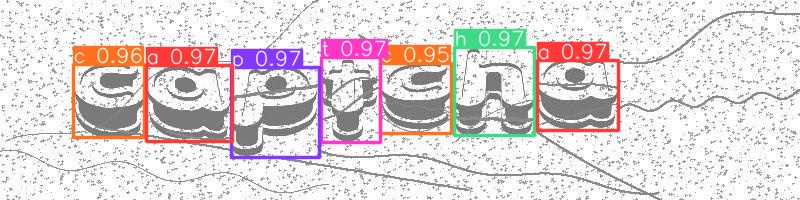

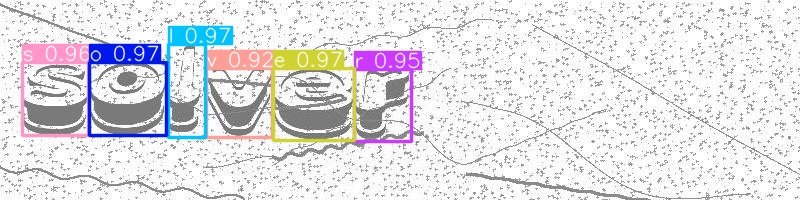

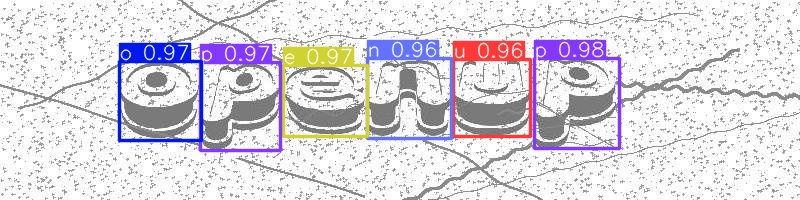

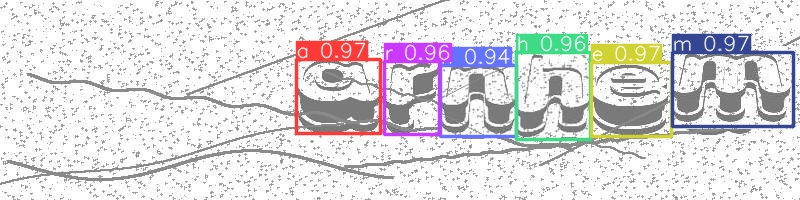

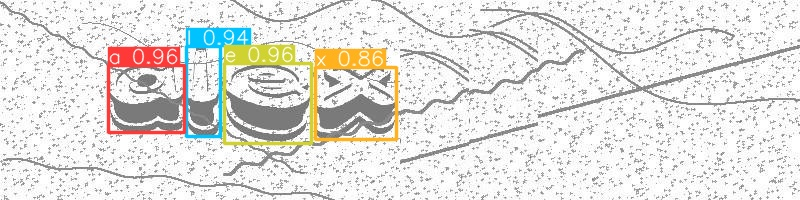

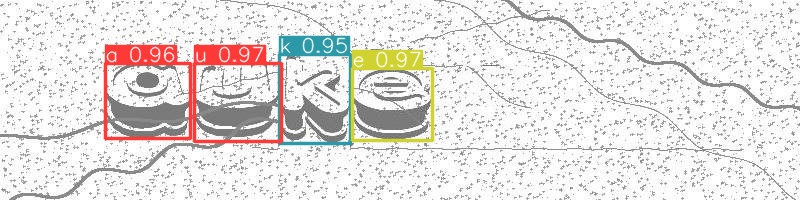

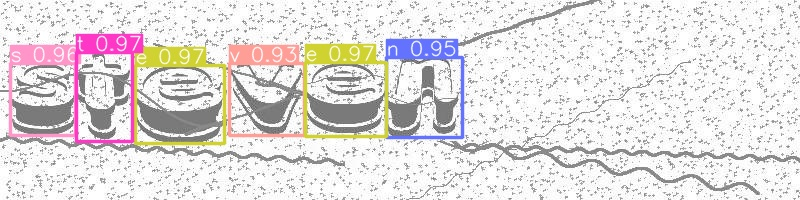

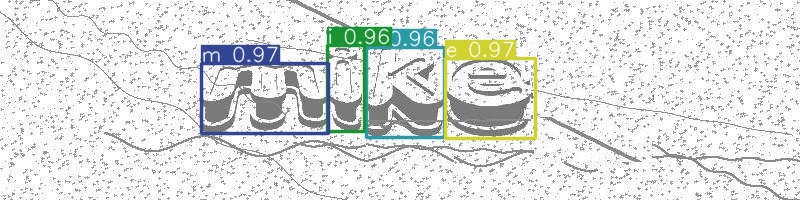

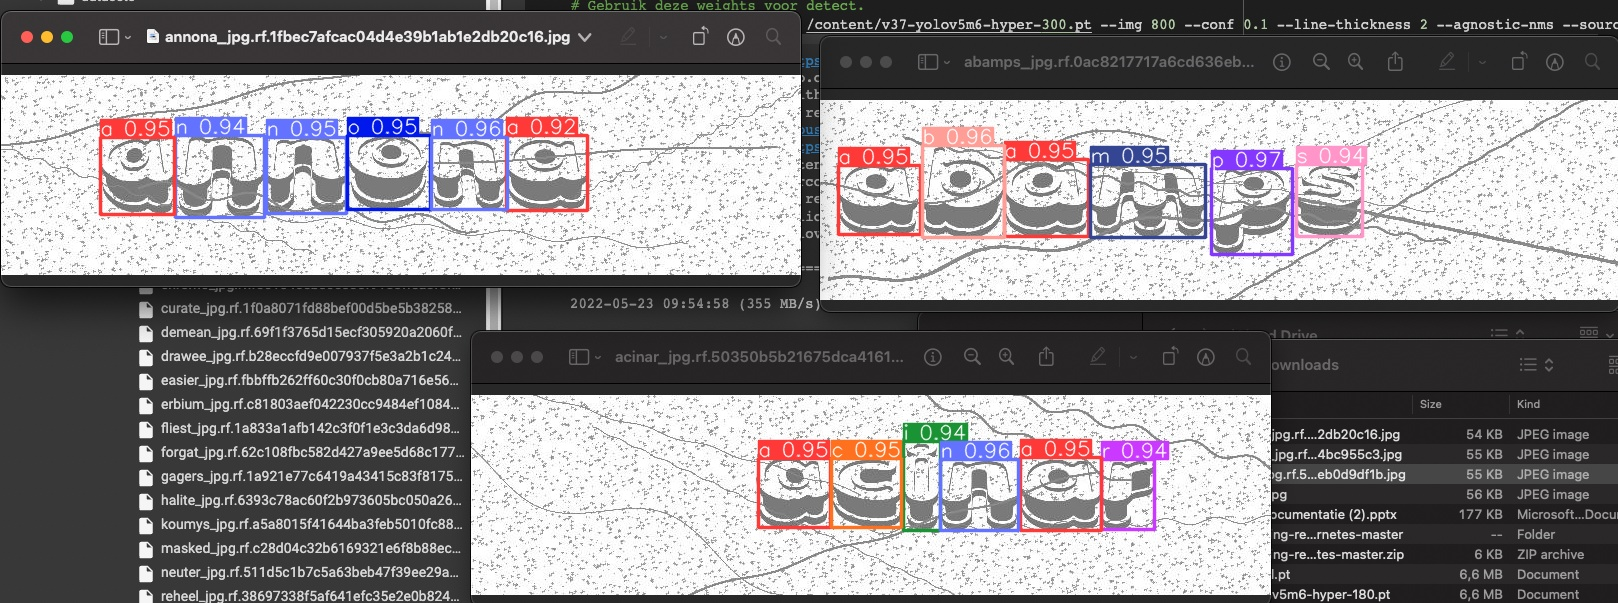

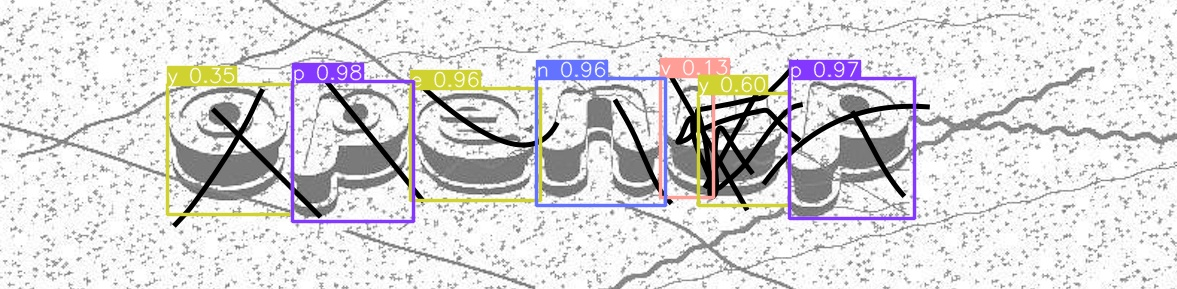

In [7]:
import glob
from IPython.display import Image, display

for imageName in sorted(glob.glob('/content/yolov5/runs/detect/exp2/*.jpg')): #assuming JPG
    display(Image(filename=imageName))
    print("\n")